In [1]:
import numpy as np
import uproot
import os
import glob
import matplotlib.pyplot as plt
import pandas as pd
import mplhep as hep

In [2]:
plt.style.use(hep.style.CMS)
plt.rcParams.update({"figure.facecolor":  (1,1,1,0)})

In [3]:
output_dir="/home/users/joytzphysics/Analysis/outputs/"
process_name="output_fullyMerge_2oslep_2ak4_1ak8_v2/"
bkg_list=['Others', 'TTX', 'DYJets']
sig_list=['WWH', 'OSWWH', 'WZH', 'ZZH']

In [4]:
list_of_df=[]
dir_name=os.path.join(output_dir,process_name)
for file in bkg_list:
    path=dir_name+file+".root:tree"
    tree=uproot.open(path)
    df_append=tree.arrays(library='pd')
    df_append["name"]=file
    df_append["is_signal"]=False
    list_of_df.append(df_append)
for file in sig_list:
    path=dir_name+file+".root:tree"
    tree=uproot.open(path)
    df_append=tree.arrays(library='pd')
    df_append["name"]=file
    df_append["is_signal"]=True
    list_of_df.append(df_append)

In [5]:
df=pd.concat(list_of_df)
df

,event,xsec_sf,lhe_mvvh,lhe_lt,lhe_st,lhe_mjj,lhe_detajj,ld_vbfjet_pt,ld_vbfjet_mass,ld_vbfjet_eta,...,xvqq_pt,xvqq_mass,xvqq_eta,xvqq_phi,b_veto,st,mvvh,lt,name,is_signal
0,261601,0.009548,0.000000,0.000000,0.000000,348.399323,2.061331,341.25000,37.218750,-0.504272,...,550.50,157.37500,-0.904297,0.637573,False,1100.945679,1258.207520,259.026466,Others,False
1,224077,0.009548,0.000000,0.000000,0.000000,394.245239,1.510437,32.78125,6.929688,1.302002,...,689.00,156.87500,-0.842651,-0.574097,False,1150.866699,1630.840942,552.328445,Others,False
2,297690,0.009548,0.000000,0.000000,0.000000,414.870148,2.006958,193.25000,11.703125,-0.179962,...,431.50,62.15625,-0.323669,1.819824,False,944.213379,1236.337280,376.978378,Others,False
3,470068,0.009548,0.000000,0.000000,0.000000,856.395081,3.401428,87.00000,9.781250,-0.810547,...,311.00,96.81250,0.487671,-0.144958,False,1049.441162,1474.636719,445.857544,Others,False
4,1186876,0.070861,0.000000,0.000000,0.000000,339.306824,1.300262,85.81250,10.187500,-0.889282,...,888.00,225.37500,-0.823242,0.143372,False,1627.676025,1726.739624,891.448334,Others,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2953,439,0.000641,2338.524414,1547.875000,2410.312500,3377.046387,6.258179,59.78125,12.390625,-3.994141,...,362.75,130.75000,2.290527,1.364746,False,3671.935547,5036.487305,1528.745003,ZZH,True
2954,561,0.000641,1532.885986,565.156250,1305.250000,3353.973389,6.717529,210.87500,28.093750,-3.368652,...,332.50,101.18750,0.175934,-1.317139,False,1692.237305,1970.804321,634.264351,ZZH,True
2955,601,0.000641,1146.344116,443.031250,1224.031250,2621.064453,8.436523,49.53125,8.789062,-4.068359,...,845.00,136.87500,0.679443,1.380615,False,1622.286621,1643.881714,634.820023,ZZH,True
2956,643,0.000641,735.864380,216.179688,1188.617188,1754.073853,7.684937,56.18750,9.781250,-3.280762,...,958.50,109.25000,0.310303,2.926758,False,2123.220459,2180.197754,268.789349,ZZH,True


In [6]:
def plotSingleObservable(observable_name, data_frame, bins_no, x_label, list_to_plot, x_range, save_dir):
    fig, axes=plt.subplots()
    hep.cms.label("Preliminary", data=True, lumi=138, loc=0, ax=axes)
    df_list=[]
    label_list=[]
    weight_list=[]
    for output_name in list_to_plot:
        select_df=data_frame[data_frame.name==output_name]
        wgt=select_df['xsec_sf']
        weight_list.append(wgt)
        df_list.append(select_df[observable_name])
        label_list.append(output_name)
    plt.hist(df_list, stacked=True, alpha=0.6, bins=bins_no, label=label_list, weights=weight_list)
    axes.set_xlim(x_range)
    axes.set_xlabel(x_label)
    axes.set_ylabel("# WGT Events")
    axes.legend(loc='upper right')
    if save_dir!=None: 
        path_name=os.path.join(save_dir, observable_name+".png")
        plt.savefig(path_name)

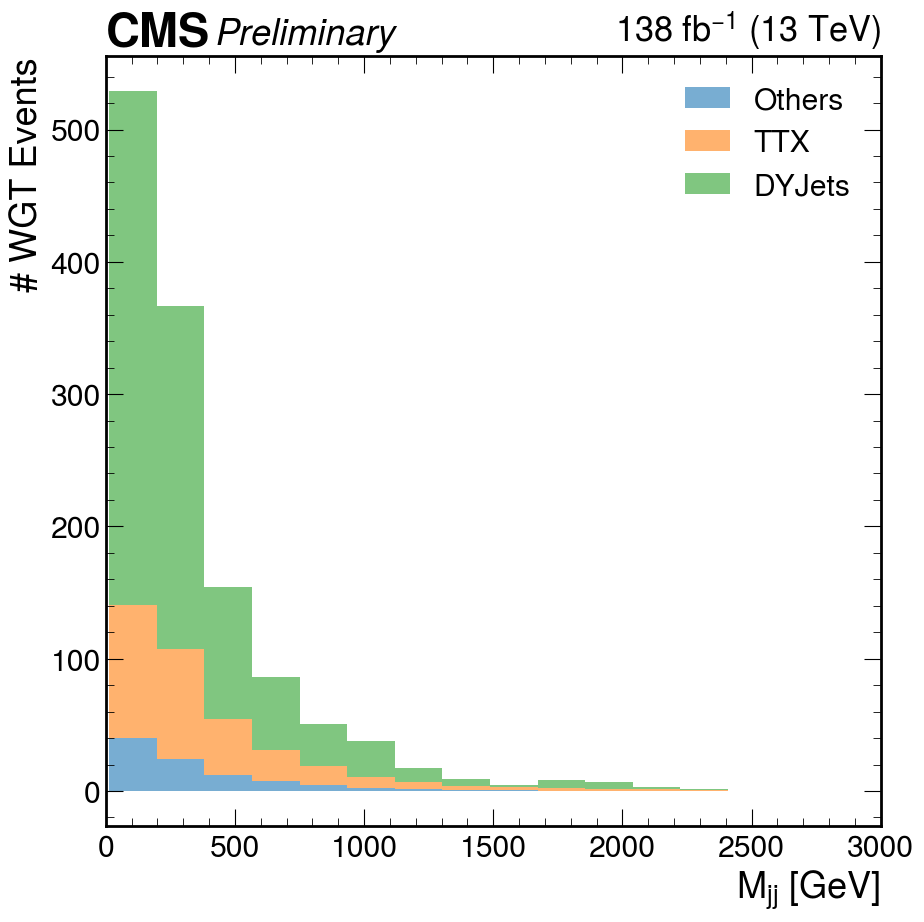

In [7]:
plotSingleObservable("mjj", df, 30, r"$M_{jj}$ [GeV]", bkg_list, (0, 3000), None)

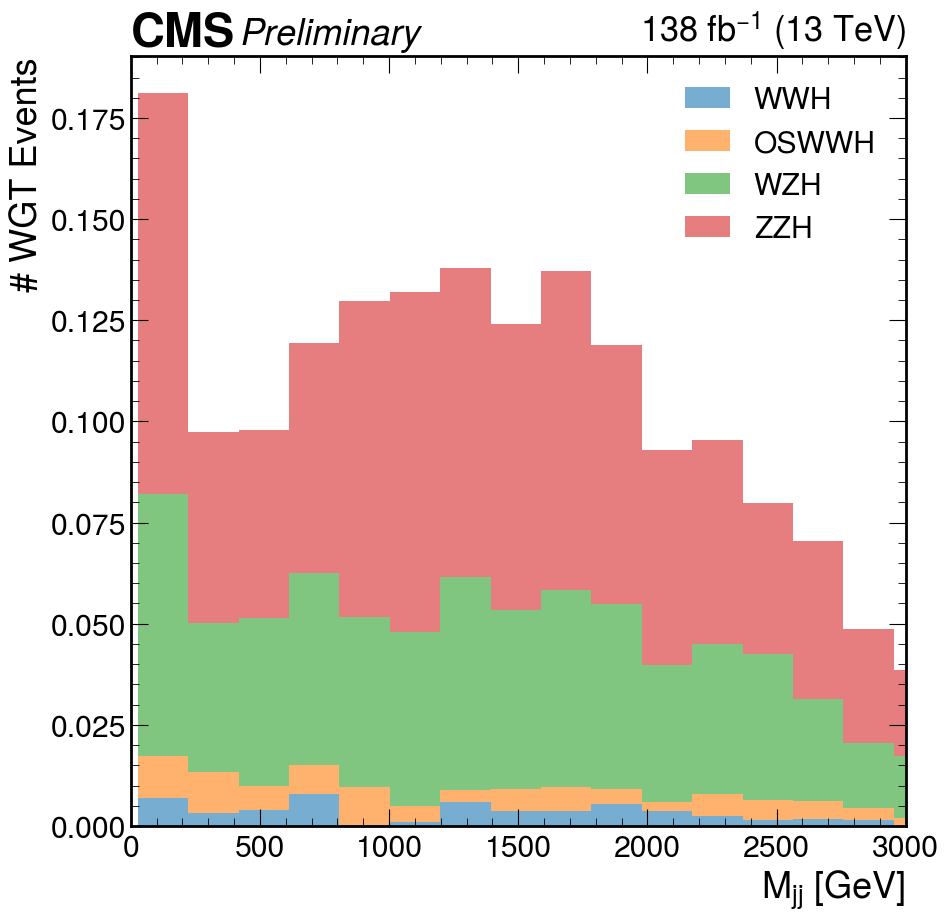

In [34]:
plotSingleObservable("mjj", df, 30, r"$M_{jj}$ [GeV]", sig_list, (0, 3000), None)

In [27]:
def plotSigAndBkg(observable_name, data_frame, bins_no, x_label, sig_list, bkg_list, x_range, save_dir, sig_times=1):
    fig, axes=plt.subplots()
    hep.cms.label("Preliminary", data=True, lumi=138, loc=0, ax=axes)
    df_list=[]
    label_list=[]
    weight_list=[]
    for output_name in sig_list:
        select_df=data_frame[data_frame.name==output_name]
        wgt=select_df['xsec_sf']*sig_times
        weight_list.append(wgt)
        df_list.append(select_df[observable_name])
        label_list.append(output_name)
    for output_name in bkg_list:
        select_df=data_frame[data_frame.name==output_name]
        wgt=select_df['xsec_sf']
        weight_list.append(wgt)
        df_list.append(select_df[observable_name])
        label_list.append(output_name)
    plt.hist(df_list, stacked=True, alpha=0.6, bins=bins_no, label=label_list, weights=weight_list)
    axes.set_xlim(x_range)
    axes.set_xlabel(x_label)
    axes.set_ylabel(r"# WGT Events (Signal $\times$"+str(sig_times)+")")
    axes.legend(loc='upper right')
    if save_dir!=None: 
        path_name=os.path.join(save_dir, observable_name+".png")
        plt.savefig(path_name)

In [28]:
PLOT_DIR="/home/users/joytzphysics/plots/2oslep2ak8"

In [36]:
df.columns.to_list()

['event',
 'xsec_sf',
 'lhe_mvvh',
 'lhe_lt',
 'lhe_st',
 'lhe_mjj',
 'lhe_detajj',
 'ld_vbfjet_pt',
 'ld_vbfjet_mass',
 'ld_vbfjet_eta',
 'ld_vbfjet_phi',
 'sd_vbfjet_pt',
 'sd_vbfjet_mass',
 'sd_vbfjet_eta',
 'sd_vbfjet_phi',
 'mjj',
 'detajj',
 'dRjj',
 'ld_lep_pt',
 'ld_lep_mass',
 'ld_lep_eta',
 'ld_lep_phi',
 'sd_lep_pt',
 'sd_lep_mass',
 'sd_lep_eta',
 'sd_lep_phi',
 'ld_lep_ID',
 'sd_lep_ID',
 'mll',
 'ptll',
 'dRll',
 'met',
 'n_ak4',
 'n_ak8',
 'hbb_score',
 'hbb_pt',
 'hbb_mass',
 'hbb_eta',
 'hbb_phi',
 'xbb_score',
 'hbb_pnetmass',
 'hbb_sdmass',
 'xvqq_score',
 'xvqq_sdmass',
 'xvqq_pnetmass',
 'xvqq_pt',
 'xvqq_mass',
 'xvqq_eta',
 'xvqq_phi',
 'b_veto',
 'st',
 'mvvh',
 'lt',
 'name',
 'is_signal']

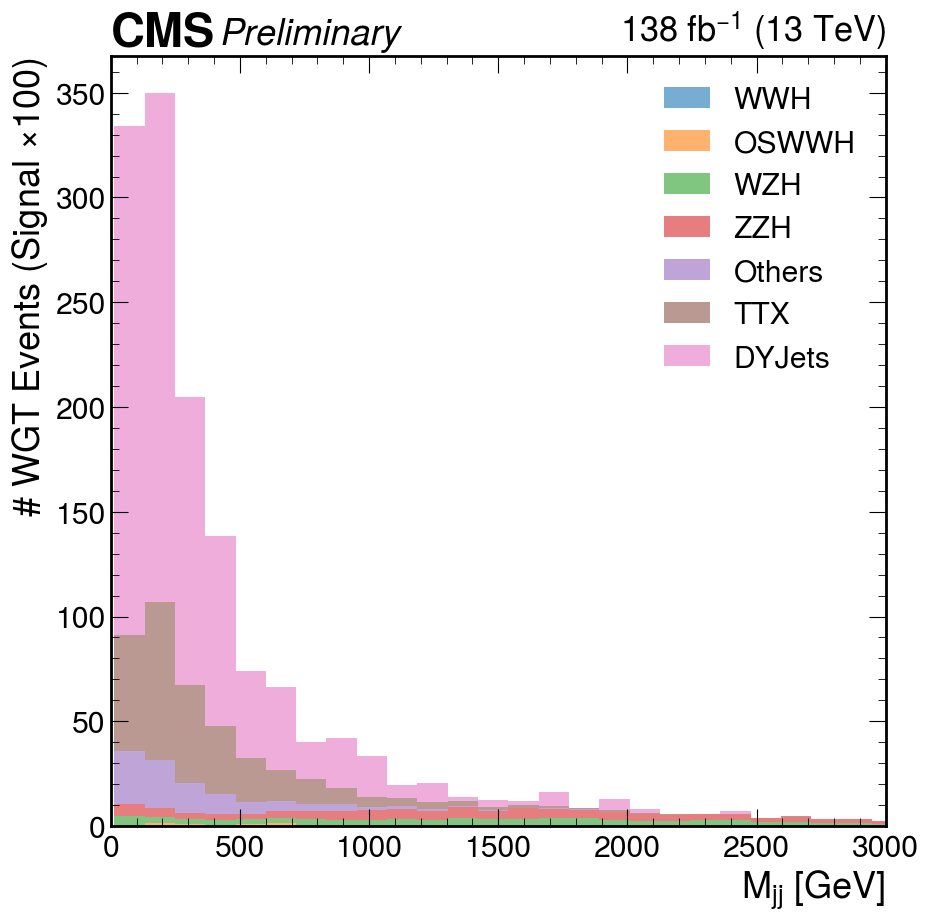

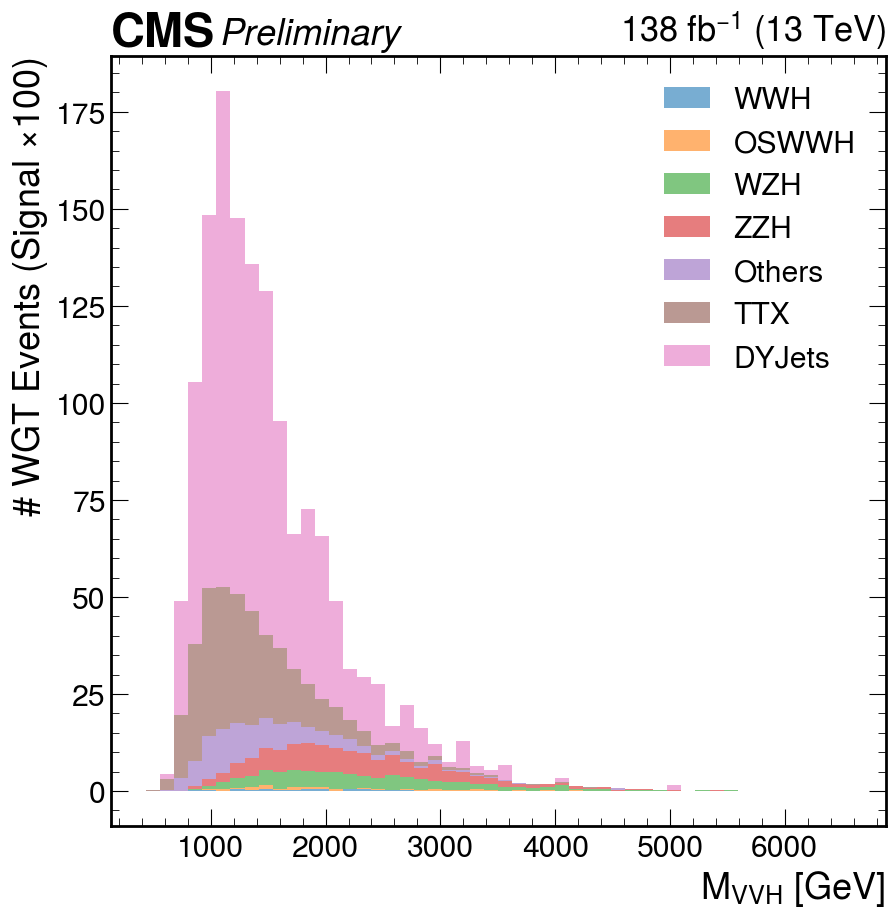

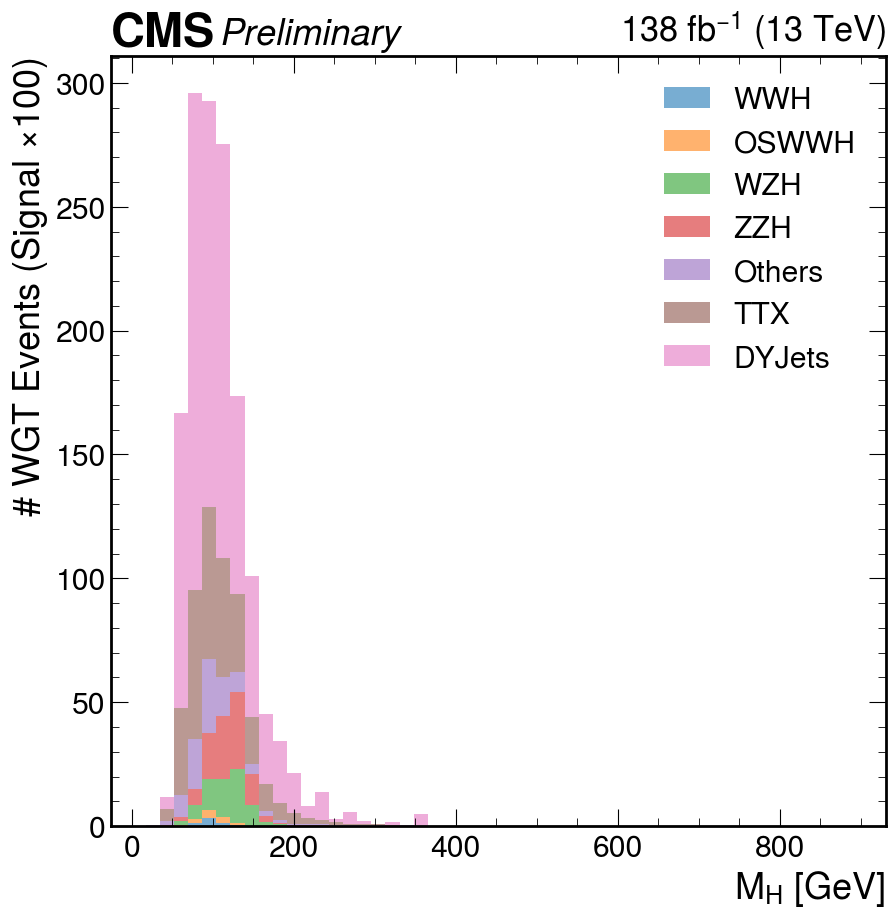

In [37]:
plotSigAndBkg("mjj",df,50,r"$M_{jj}$ [GeV]", sig_list, bkg_list,(0,3000),PLOT_DIR, 100)
plotSigAndBkg("mvvh",df,50,r"$M_{VVH}$ [GeV]", sig_list, bkg_list, None,PLOT_DIR, 100)

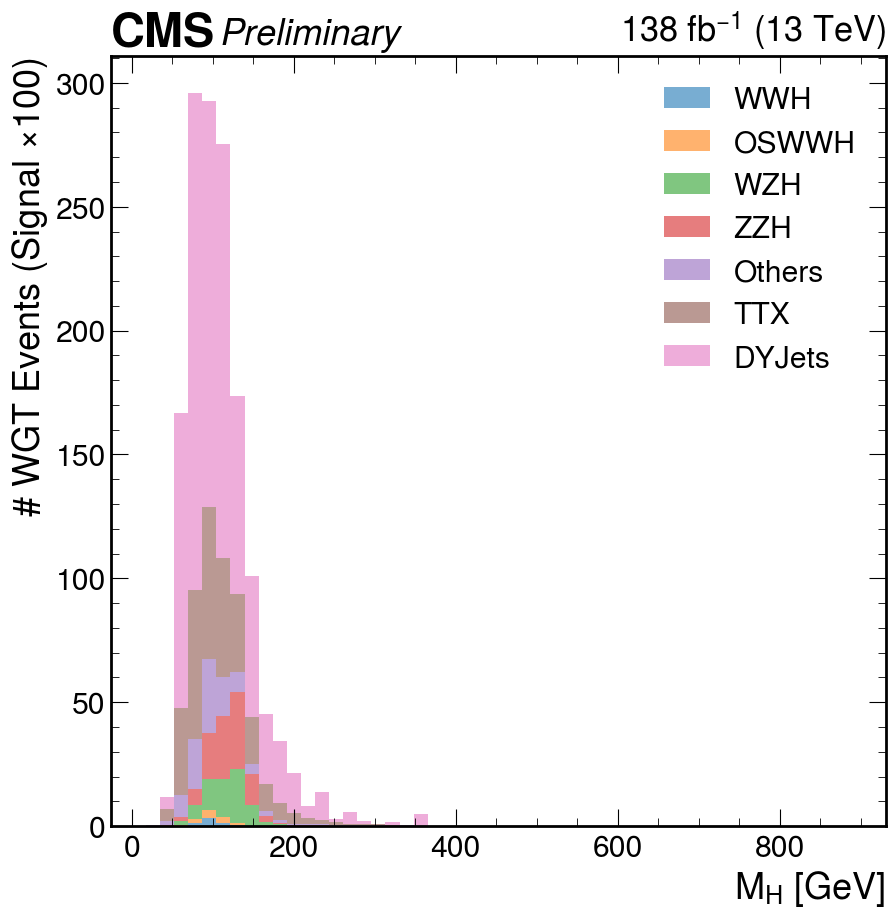

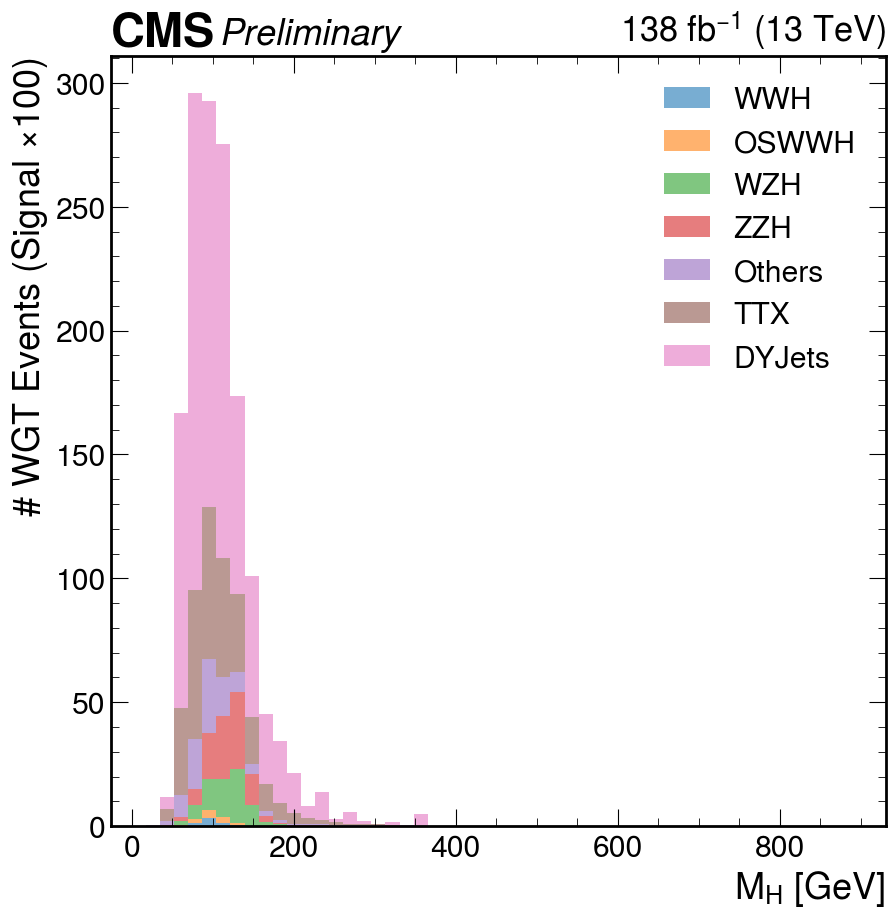

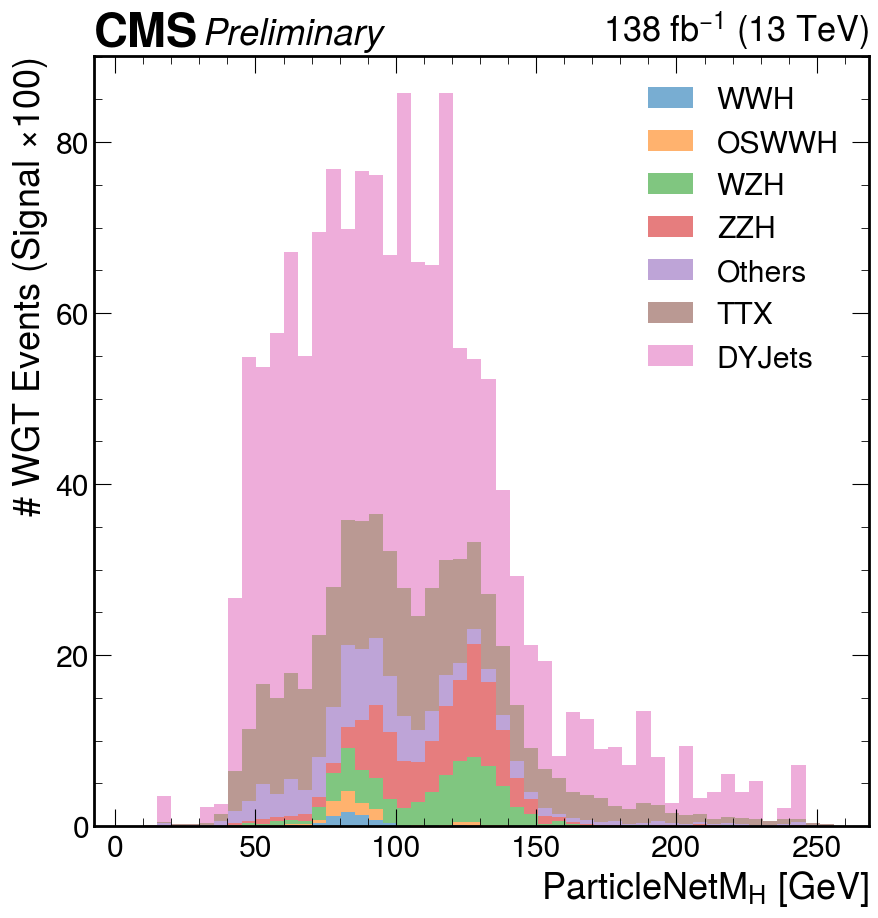

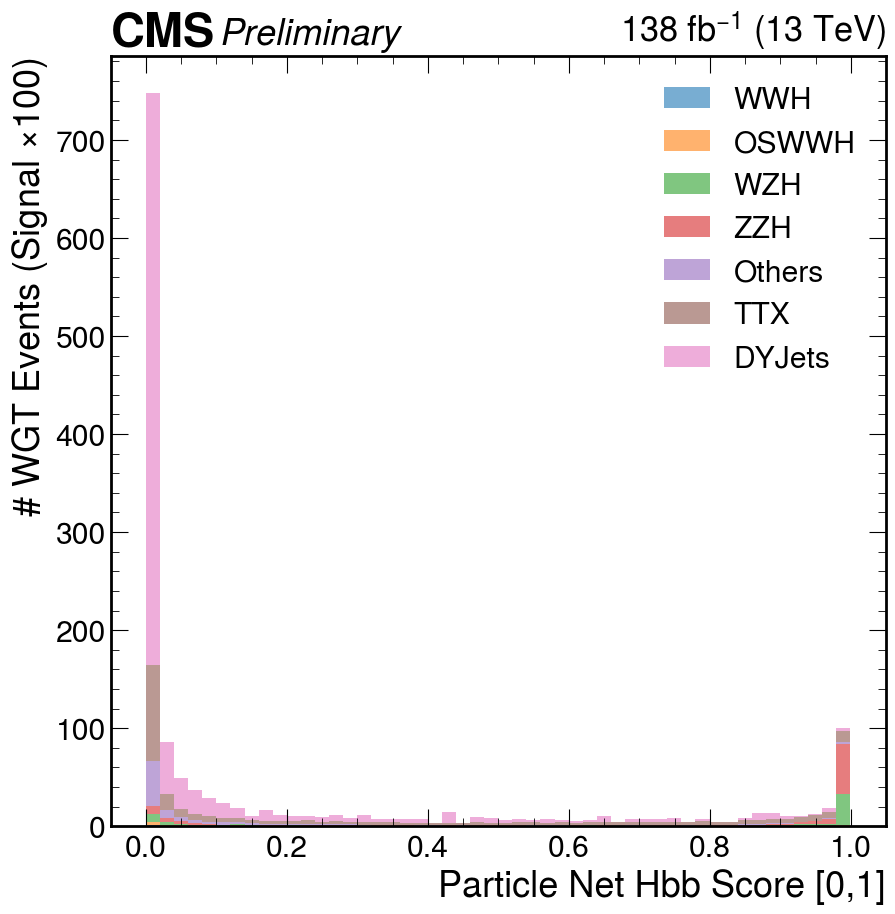

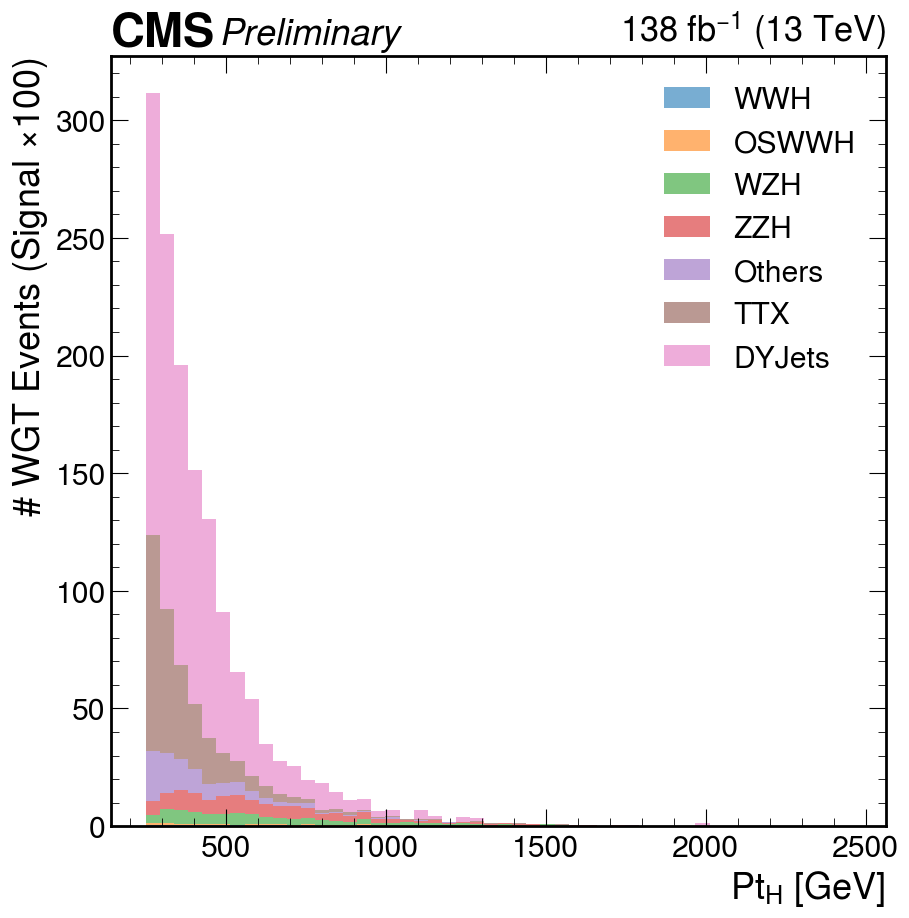

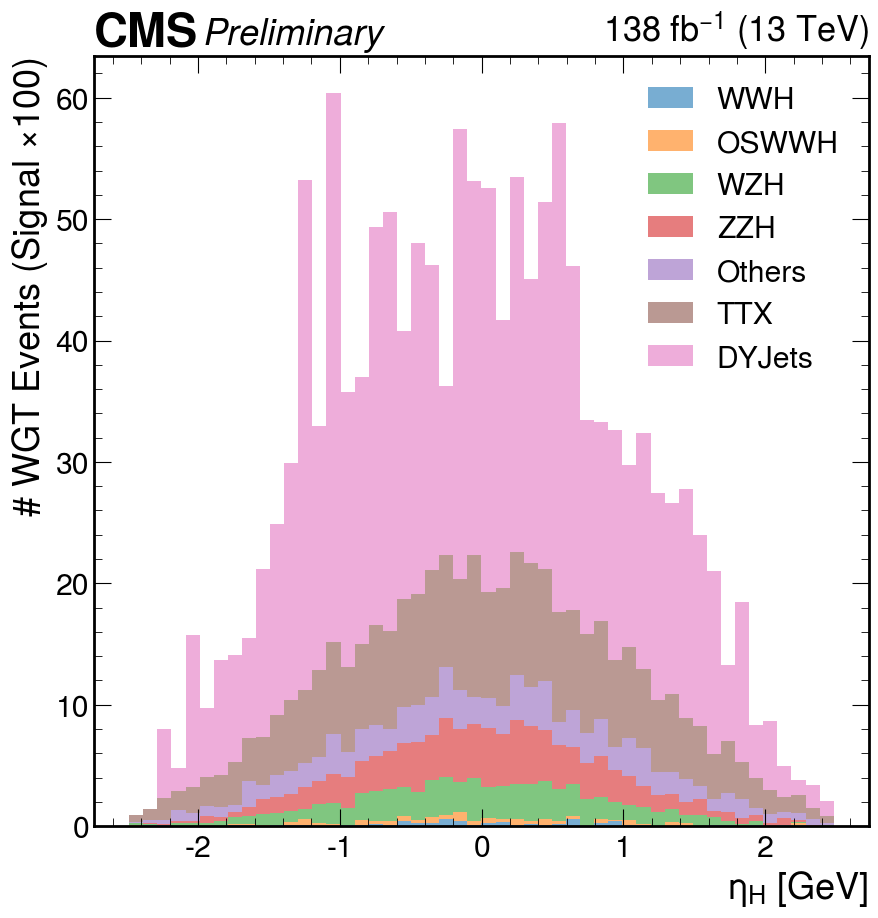

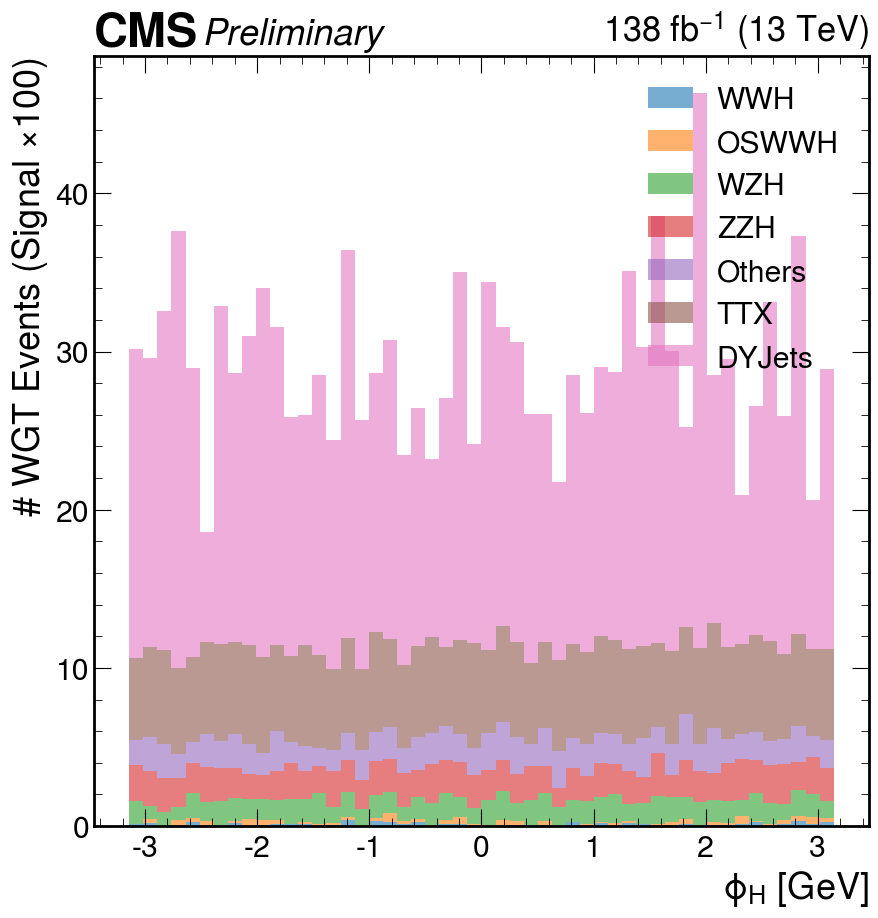

In [39]:
plotSigAndBkg("hbb_mass",df,50,r"$M_{H}$ [GeV]", sig_list, bkg_list, None,PLOT_DIR, 100)
plotSigAndBkg("hbb_pnetmass",df,50,r"$ParticleNet M_{H}$ [GeV]", sig_list, bkg_list, None,PLOT_DIR, 100)
plotSigAndBkg("hbb_sdmass",df,50,r"$Softdrop M_{H}$ [GeV]", sig_list, bkg_list, None,PLOT_DIR, 100)
plotSigAndBkg("hbb_score",df,50,r"Particle Net Hbb Score [0,1]", sig_list, bkg_list, None,PLOT_DIR, 100)
plotSigAndBkg("hbb_pt",df,50,r"$Pt_H$ [GeV]", sig_list, bkg_list, None,PLOT_DIR, 100)
plotSigAndBkg("hbb_eta",df,50,r"$\eta_H$ [GeV]", sig_list, bkg_list, None,PLOT_DIR, 100)
plotSigAndBkg("hbb_phi",df,50,r"$\phi_H$ [GeV]", sig_list, bkg_list, None,PLOT_DIR, 100)

In [ ]:
plotSigAndBkg("xvqq_sdmass",df,50,r"Softdrop $M_{V\to qq}$ [GeV]", sig_list, bkg_list, None,PLOT_DIR, 100)
plotSigAndBkg("xvqq_pt",df,50,r"Pt_{V\to qq}$ [GeV]", sig_list, bkg_list, None,PLOT_DIR, 100)
plotSigAndBkg("xvqq_eta",df,50,r"\eta_{V\to qq}$ [GeV]", sig_list, bkg_list, None,PLOT_DIR, 100)
plotSigAndBkg("xvqq_eta",df,50,r"\eta_{V\to qq}$ [GeV]", sig_list, bkg_list, None,PLOT_DIR, 100)